<center><h1>REGRESIÓN LINEAL</h1></center>

<ul>
    <li> Lectura y análisis de los datos </li>
    <li> Limpieza y transformación de los datos </li>
    <li> Entrenamiento de un modelo de regresión lineal </li>
    <li> Evaluación del modelo </li>
</ul>

In [445]:
#importar las librerias

# Procesar la informacion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Regresion Lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Evaluacion del Modelo
from sklearn.metrics import mean_squared_error, r2_score

In [446]:
# Cargar el dataset
df = pd.read_csv('dataset_banco1.csv')

In [447]:
#Obtener informacion del dataset - Etiquetas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45192 entries, 0 to 45191
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45192 non-null  int64  
 1   job        45192 non-null  object 
 2   marital    45192 non-null  object 
 3   education  45192 non-null  object 
 4   default    45192 non-null  object 
 5   balance    45192 non-null  float64
 6   housing    45192 non-null  object 
 7   loan       45192 non-null  object 
 8   contact    45192 non-null  object 
 9   day        45192 non-null  int64  
 10  month      45192 non-null  object 
 11  duration   45192 non-null  float64
 12  campaign   45192 non-null  int64  
 13  pdays      45192 non-null  float64
 14  previous   45192 non-null  int64  
 15  poutcome   45192 non-null  object 
 16  y          45192 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [448]:
#Obtener informacion del dataset - Datos
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45187,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45188,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45189,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45190,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


<h2>Limpieza y transformación de los datos</h2>

In [449]:
#Eliminar las filas con valores nulos
df = df.dropna()

In [450]:
#Obtener informacion del dataset - Etiquetas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45192 entries, 0 to 45191
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45192 non-null  int64  
 1   job        45192 non-null  object 
 2   marital    45192 non-null  object 
 3   education  45192 non-null  object 
 4   default    45192 non-null  object 
 5   balance    45192 non-null  float64
 6   housing    45192 non-null  object 
 7   loan       45192 non-null  object 
 8   contact    45192 non-null  object 
 9   day        45192 non-null  int64  
 10  month      45192 non-null  object 
 11  duration   45192 non-null  float64
 12  campaign   45192 non-null  int64  
 13  pdays      45192 non-null  float64
 14  previous   45192 non-null  int64  
 15  poutcome   45192 non-null  object 
 16  y          45192 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [451]:
# Filtrar las filas donde la edad esté entre 18 y 100
df = df[(df['age'] >= 18) & (df['age'] <= 100)]

# Filtrar las filas donde los dias esté entre 0 o mayor
df = df[(df['pdays'] >= 0)]

# Verificar el DataFrame después de la eliminación
print(df)

       age           job  marital  education default  balance housing loan  \
1187    59    management  married   tertiary      no    138.0     yes  yes   
24053   33        admin.  married   tertiary      no    882.0      no   no   
24055   42        admin.   single  secondary      no   -247.0     yes  yes   
24057   33      services  married  secondary      no   3444.0     yes   no   
24065   36    management  married   tertiary      no   2415.0     yes   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45180   34   blue-collar   single  secondary      no   1475.0     yes   no   
45182   53    management  married   tertiary      no    583.0      no   no   
45185   73       retired  married  secondary      no   2850.0      no   no   
45189   72       retired  married  secondary      no   5715.0      no   no   
45191   37  entrepreneur  married  secondary      no   2971.0      no   no   

         contact  day month  duration  campaign  pdays  previou

In [452]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8251 entries, 1187 to 45191
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8251 non-null   int64  
 1   job        8251 non-null   object 
 2   marital    8251 non-null   object 
 3   education  8251 non-null   object 
 4   default    8251 non-null   object 
 5   balance    8251 non-null   float64
 6   housing    8251 non-null   object 
 7   loan       8251 non-null   object 
 8   contact    8251 non-null   object 
 9   day        8251 non-null   int64  
 10  month      8251 non-null   object 
 11  duration   8251 non-null   float64
 12  campaign   8251 non-null   int64  
 13  pdays      8251 non-null   float64
 14  previous   8251 non-null   int64  
 15  poutcome   8251 non-null   object 
 16  y          8251 non-null   object 
dtypes: float64(3), int64(4), object(10)
memory usage: 1.1+ MB


In [453]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1187,59,management,married,tertiary,no,138.0,yes,yes,cellular,16,nov,162.0,2,187.0,5,failure,no
24053,33,admin.,married,tertiary,no,882.0,no,no,telephone,21,oct,39.0,1,151.0,3,failure,no
24055,42,admin.,single,secondary,no,-247.0,yes,yes,telephone,21,oct,519.0,1,166.0,1,other,yes
24057,33,services,married,secondary,no,3444.0,yes,no,telephone,21,oct,144.0,1,91.0,4,failure,yes
24065,36,management,married,tertiary,no,2415.0,yes,no,telephone,22,oct,73.0,1,86.0,4,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45180,34,blue-collar,single,secondary,no,1475.0,yes,no,cellular,16,nov,1166.0,3,530.0,12,other,no
45182,53,management,married,tertiary,no,583.0,no,no,cellular,17,nov,226.0,1,184.0,4,success,yes
45185,73,retired,married,secondary,no,2850.0,no,no,cellular,17,nov,300.0,1,40.0,8,failure,yes
45189,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes


In [454]:
# Valores únicos de la columna 'job'
print(df['job'].unique(),"job")
# Valores únicos de la columna 'marital'
print(df['marital'].unique(),"marital")
# Valores únicos de la columna 'education'
print(df['education'].unique(),"education")
# Valores únicos de la columna 'default'
print(df['default'].unique(),"default")
# Valores únicos de la columna 'housing'
print(df['housing'].unique(),"housing")
# Valores únicos de la columna 'loan'
print(df['loan'].unique(),"loan")
# Valores únicos de la columna 'contact'
print(df['contact'].unique(),"contact")
# Valores únicos de la columna 'month'
print(df['month'].unique(),"month")
# Valores únicos de la columna 'poutcome'
print(df['poutcome'].unique(),"poutcome")


['management' 'admin.' 'services' 'technician' 'blue-collar' 'unemployed'
 'entrepreneur' 'housemaid' 'retired' 'self-employed' 'unknown' 'student'] job
['married' 'single' 'divorced'] marital
['tertiary' 'secondary' 'primary' 'unknown'] education
['no' 'yes'] default
['yes' 'no'] housing
['yes' 'no'] loan
['cellular' 'telephone' 'unknown' 'mobile'] contact
['nov' 'oct' 'jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sep' 'dec'] month
['failure' 'other' 'success' 'Success' 'unknown'] poutcome


In [455]:
# Limpiar y unificar valores en la columna 'job'
df['job'] = df['job'].replace(['Management', 'MANAGEMENT'], 'management')
df['job'] = df['job'].replace(['Self-employed'], 'self-employed')
df['job'] = df['job'].replace(['Services'], 'services')
df['job'] = df['job'].replace(['administrative', 'admin.'], 'admin.')
df['job'] = df['job'].replace(['Retired'], 'retired.')

# Limpiar y unificar valores en la columna 'marital'
df['marital'] = df['marital'].replace(['Single'], 'single')
df['marital'] = df['marital'].replace(['div.', 'DIVORCED'], 'divorced')

# Limpiar y unificar valores en la columna 'education'
df['education'] = df['education'].replace(['SECONDARY', 'Secondary', 'sec.'], 'secondary')
df['education'] = df['education'].replace(['Primary'], 'primary')
df['education'] = df['education'].replace(['Tertiary'], 'tertiary')
df['education'] = df['education'].replace(['UNK'], 'unknown')

# Limpiar y unificar valores en la columna 'loan'
df['loan'] = df['loan'].replace(['Yes', 'YES'], 'yes')
df['loan'] = df['loan'].replace(['No', 'NO'], 'no')

# Limpiar y unificar valores en la columna 'contact'
df['contact'] = df['contact'].replace(['phone', 'telephone'], 'telephone')
df['contact'] = df['contact'].replace(['mobile'], 'cellular')

# Limpiar y unificar valores en la columna 'poutcome'
df['poutcome'] = df['poutcome'].replace(['UNK'], 'unknown')
df['poutcome'] = df['poutcome'].replace(['Success'], 'success')


In [456]:
# Valores únicos de la columna 'job'
print(df['job'].unique(),"job")
# Valores únicos de la columna 'marital'
print(df['marital'].unique(),"marital")
# Valores únicos de la columna 'education'
print(df['education'].unique(),"education")
# Valores únicos de la columna 'default'
print(df['default'].unique(),"default")
# Valores únicos de la columna 'housing'
print(df['housing'].unique(),"housing")
# Valores únicos de la columna 'loan'
print(df['loan'].unique(),"loan")
# Valores únicos de la columna 'contact'
print(df['contact'].unique(),"contact")
# Valores únicos de la columna 'month'
print(df['month'].unique(),"month")
# Valores únicos de la columna 'poutcome'
print(df['poutcome'].unique(),"poutcome")


['management' 'admin.' 'services' 'technician' 'blue-collar' 'unemployed'
 'entrepreneur' 'housemaid' 'retired' 'self-employed' 'unknown' 'student'] job
['married' 'single' 'divorced'] marital
['tertiary' 'secondary' 'primary' 'unknown'] education
['no' 'yes'] default
['yes' 'no'] housing
['yes' 'no'] loan
['cellular' 'telephone' 'unknown'] contact
['nov' 'oct' 'jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sep' 'dec'] month
['failure' 'other' 'success' 'unknown'] poutcome


In [457]:
job_mapping = {value: i+1 for i, value in enumerate(
    ['management', 'technician', 'entrepreneur', 'blue-collar', 
        'unknown', 'retired', 'admin.', 'services', 'self-employed', 
            'unemployed', 'housemaid', 'student', 'Retired'])}
df['job'] = df['job'].map(job_mapping)

marital_mapping = {value: i+1 for i, value in enumerate(['married', 'single', 'divorced'])}
df['marital'] = df['marital'].map(marital_mapping)

education_mapping = {value: i+1 for i, value in enumerate(['tertiary', 'secondary', 'unknown', 'primary'])}
df['education'] = df['education'].map(education_mapping)

default_mapping = {value: i+1 for i, value in enumerate(['no', 'yes'])}
df['default'] = df['default'].map(default_mapping)

housing_mapping = {value: i+1 for i, value in enumerate(['yes', 'no'])}
df['housing'] = df['housing'].map(housing_mapping)

loan_mapping = {value: i+1 for i, value in enumerate(['no', 'yes'])}
df['loan'] = df['loan'].map(loan_mapping)

contact_mapping = {value: i+1 for i, value in enumerate(['unknown', 'cellular', 'telephone'])}
df['contact'] = df['contact'].map(contact_mapping)

month_mapping = {value: i+1 for i, value in enumerate(
    ['may', 'nov', 'jun', 'jul', 'aug', 'oct', 'dec', 'jan', 
        'feb', 'mar', 'apr', 'sep'])}
df['month'] = df['month'].map(month_mapping)

poutcome_mapping = {value: i+1 for i, value in enumerate(['unknown', 'failure', 'other', 'success'])}
df['poutcome'] = df['poutcome'].map(poutcome_mapping)

loan_mapping = {value: i+1 for i, value in enumerate(['yes', 'no'])}
df['y'] = df['y'].map(loan_mapping)

# Verificar el DataFrame después de la conversión
print(df)


       age  job  marital  education  default  balance  housing  loan  contact  \
1187    59    1        1          1        1    138.0        1     2        2   
24053   33    7        1          1        1    882.0        2     1        3   
24055   42    7        2          2        1   -247.0        1     2        3   
24057   33    8        1          2        1   3444.0        1     1        3   
24065   36    1        1          1        1   2415.0        1     1        3   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45180   34    4        2          2        1   1475.0        1     1        2   
45182   53    1        1          1        1    583.0        2     1        2   
45185   73    6        1          2        1   2850.0        2     1        2   
45189   72    6        1          2        1   5715.0        2     1        2   
45191   37    3        1          2        1   2971.0        2     1        2   

       day  month  duration

In [458]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1187,59,1,1,1,1,138.0,1,2,2,16,2,162.0,2,187.0,5,2,2
24053,33,7,1,1,1,882.0,2,1,3,21,6,39.0,1,151.0,3,2,2
24055,42,7,2,2,1,-247.0,1,2,3,21,6,519.0,1,166.0,1,3,1
24057,33,8,1,2,1,3444.0,1,1,3,21,6,144.0,1,91.0,4,2,1
24065,36,1,1,1,1,2415.0,1,1,3,22,6,73.0,1,86.0,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45180,34,4,2,2,1,1475.0,1,1,2,16,2,1166.0,3,530.0,12,3,2
45182,53,1,1,1,1,583.0,2,1,2,17,2,226.0,1,184.0,4,4,1
45185,73,6,1,2,1,2850.0,2,1,2,17,2,300.0,1,40.0,8,2,1
45189,72,6,1,2,1,5715.0,2,1,2,17,2,1127.0,5,184.0,3,4,1


In [459]:
#Eliminar las columnas que no se van a utilizar
df = df.drop(['housing', 'default', 'month'], axis=1)

In [460]:
df

,age,job,marital,education,balance,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
1187,59,1,1,1,138.0,2,2,16,162.0,2,187.0,5,2,2
24053,33,7,1,1,882.0,1,3,21,39.0,1,151.0,3,2,2
24055,42,7,2,2,-247.0,2,3,21,519.0,1,166.0,1,3,1
24057,33,8,1,2,3444.0,1,3,21,144.0,1,91.0,4,2,1
24065,36,1,1,1,2415.0,1,3,22,73.0,1,86.0,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45180,34,4,2,2,1475.0,1,2,16,1166.0,3,530.0,12,3,2
45182,53,1,1,1,583.0,1,2,17,226.0,1,184.0,4,4,1
45185,73,6,1,2,2850.0,1,2,17,300.0,1,40.0,8,2,1
45189,72,6,1,2,5715.0,1,2,17,1127.0,5,184.0,3,4,1


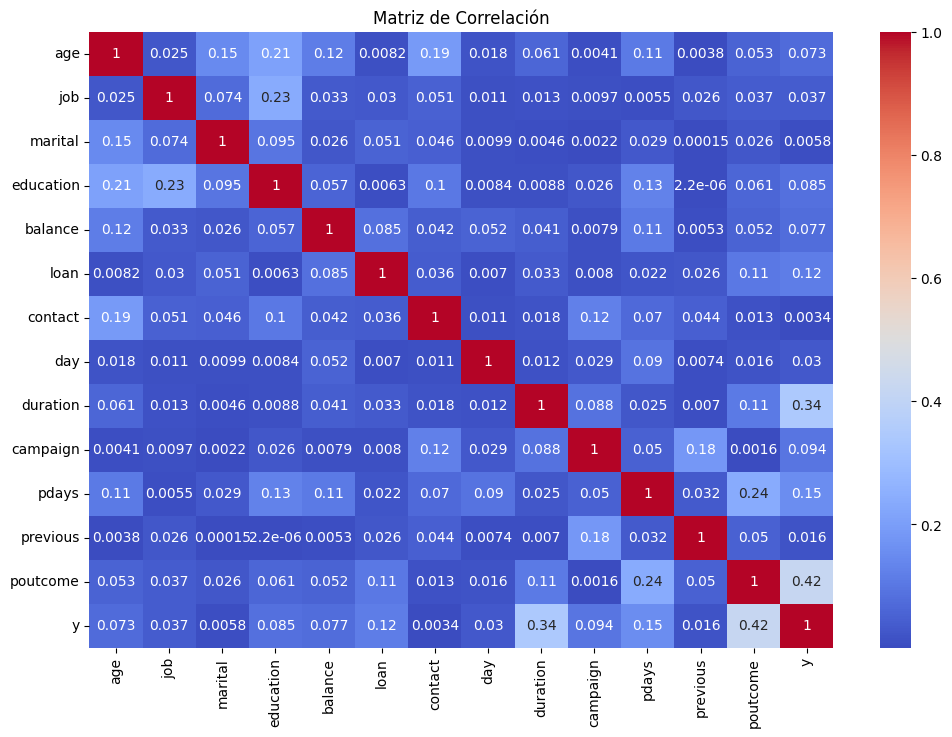

In [461]:
# calcular la matriz de correlación de todas las variables del DataFrame
correlation_matrix = df.corr().abs()

# Obtener las variables más correlacionadas
most_correlated = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Visualizar las variables más correlacionadas
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [462]:
# Imprimir las variables más correlacionadas
for (var1, var2), correlacion in most_correlated.items():
    print(f"Las variables '{var1}' y '{var2}' tienen una correlación de {correlacion}.")

Las variables 'age' y 'age' tienen una correlación de 1.0.
Las variables 'poutcome' y 'y' tienen una correlación de 0.4202429980207171.
Las variables 'y' y 'duration' tienen una correlación de 0.3415140146424033.
Las variables 'poutcome' y 'pdays' tienen una correlación de 0.23696448423759317.
Las variables 'job' y 'education' tienen una correlación de 0.23479771328309285.
Las variables 'education' y 'age' tienen una correlación de 0.2096040242580332.
Las variables 'contact' y 'age' tienen una correlación de 0.18981520738888735.
Las variables 'campaign' y 'previous' tienen una correlación de 0.18017615464617984.
Las variables 'y' y 'pdays' tienen una correlación de 0.1525198003379846.
Las variables 'age' y 'marital' tienen una correlación de 0.14721893522737833.
Las variables 'education' y 'pdays' tienen una correlación de 0.1283186869177562.
Las variables 'contact' y 'campaign' tienen una correlación de 0.12214419755043729.
Las variables 'loan' y 'y' tienen una correlación de 0.115496

In [463]:
#Eliminar las columnas que no se correlacionan
df = df.drop(['job', 'marital', 'loan', 'day', 'campaign', 'previous'], axis=1)

In [464]:
df

,age,education,balance,contact,duration,pdays,poutcome,y
1187,59,1,138.0,2,162.0,187.0,2,2
24053,33,1,882.0,3,39.0,151.0,2,2
24055,42,2,-247.0,3,519.0,166.0,3,1
24057,33,2,3444.0,3,144.0,91.0,2,1
24065,36,1,2415.0,3,73.0,86.0,3,2
...,...,...,...,...,...,...,...,...
45180,34,2,1475.0,2,1166.0,530.0,3,2
45182,53,1,583.0,2,226.0,184.0,4,1
45185,73,2,2850.0,2,300.0,40.0,2,1
45189,72,2,5715.0,2,1127.0,184.0,4,1


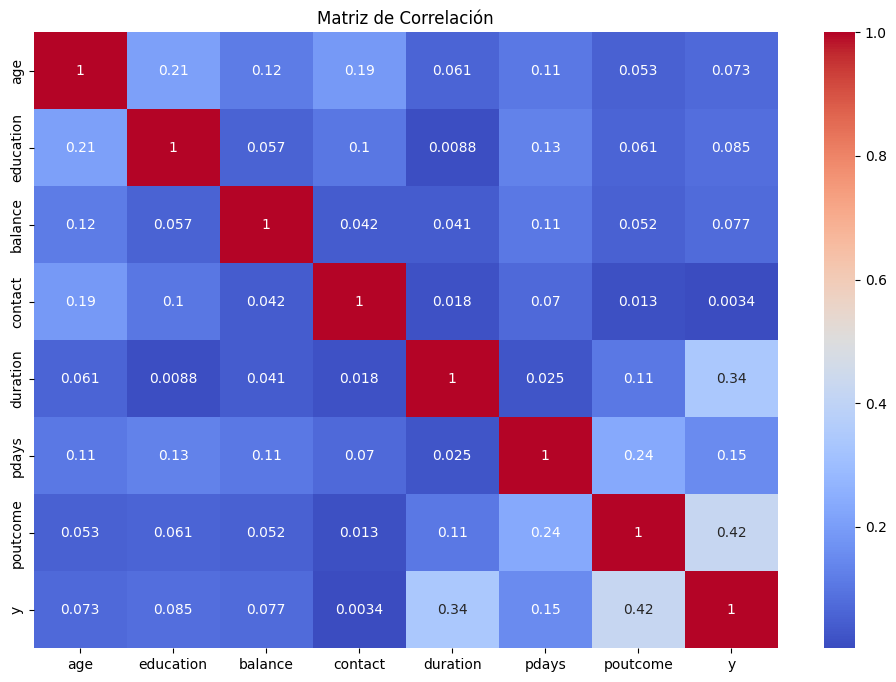

In [465]:
# calcular la matriz de correlación de todas las variables del DataFrame
correlation_matrix = df.corr().abs()

# Obtener las variables más correlacionadas
most_correlated = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Visualizar las variables más correlacionadas
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [466]:
# Imprimir las variables más correlacionadas
for (var1, var2), correlacion in most_correlated.items():
    print(f"Las variables '{var1}' y '{var2}' tienen una correlación de {correlacion}.")

Las variables 'age' y 'age' tienen una correlación de 1.0.
Las variables 'poutcome' y 'y' tienen una correlación de 0.4202429980207171.
Las variables 'duration' y 'y' tienen una correlación de 0.3415140146424033.
Las variables 'pdays' y 'poutcome' tienen una correlación de 0.23696448423759317.
Las variables 'age' y 'education' tienen una correlación de 0.2096040242580332.
Las variables 'contact' y 'age' tienen una correlación de 0.18981520738888735.
Las variables 'y' y 'pdays' tienen una correlación de 0.1525198003379846.
Las variables 'education' y 'pdays' tienen una correlación de 0.1283186869177562.
Las variables 'balance' y 'age' tienen una correlación de 0.11542255122458314.
Las variables 'pdays' y 'balance' tienen una correlación de 0.10804503315021545.
Las variables 'poutcome' y 'duration' tienen una correlación de 0.10795971747969844.
Las variables 'age' y 'pdays' tienen una correlación de 0.10768461377051065.
Las variables 'contact' y 'education' tienen una correlación de 0.10

In [467]:
df

,age,education,balance,contact,duration,pdays,poutcome,y
1187,59,1,138.0,2,162.0,187.0,2,2
24053,33,1,882.0,3,39.0,151.0,2,2
24055,42,2,-247.0,3,519.0,166.0,3,1
24057,33,2,3444.0,3,144.0,91.0,2,1
24065,36,1,2415.0,3,73.0,86.0,3,2
...,...,...,...,...,...,...,...,...
45180,34,2,1475.0,2,1166.0,530.0,3,2
45182,53,1,583.0,2,226.0,184.0,4,1
45185,73,2,2850.0,2,300.0,40.0,2,1
45189,72,2,5715.0,2,1127.0,184.0,4,1


In [468]:
#Cambiar el nombre de las columnas correlacionadas
df.columns = ['Edad', 'Educacion', 'Balance', 'Contacto', 'Duracion', 'Dias_Pasados', 'Resultado_Campaña_Anterior', 'Suscribio']

In [469]:
df

,Edad,Educacion,Balance,Contacto,Duracion,Dias_Pasados,Resultado_Campaña_Anterior,Suscribio
1187,59,1,138.0,2,162.0,187.0,2,2
24053,33,1,882.0,3,39.0,151.0,2,2
24055,42,2,-247.0,3,519.0,166.0,3,1
24057,33,2,3444.0,3,144.0,91.0,2,1
24065,36,1,2415.0,3,73.0,86.0,3,2
...,...,...,...,...,...,...,...,...
45180,34,2,1475.0,2,1166.0,530.0,3,2
45182,53,1,583.0,2,226.0,184.0,4,1
45185,73,2,2850.0,2,300.0,40.0,2,1
45189,72,2,5715.0,2,1127.0,184.0,4,1


In [470]:
# Crear la columna "promedio_duracion_dias"
df['promedio_duracion_dias'] = (df['Duracion'] + df['Dias_Pasados']) / 2

In [471]:
df

,Edad,Educacion,Balance,Contacto,Duracion,Dias_Pasados,Resultado_Campaña_Anterior,Suscribio,promedio_duracion_dias
1187,59,1,138.0,2,162.0,187.0,2,2,174.5
24053,33,1,882.0,3,39.0,151.0,2,2,95.0
24055,42,2,-247.0,3,519.0,166.0,3,1,342.5
24057,33,2,3444.0,3,144.0,91.0,2,1,117.5
24065,36,1,2415.0,3,73.0,86.0,3,2,79.5
...,...,...,...,...,...,...,...,...,...
45180,34,2,1475.0,2,1166.0,530.0,3,2,848.0
45182,53,1,583.0,2,226.0,184.0,4,1,205.0
45185,73,2,2850.0,2,300.0,40.0,2,1,170.0
45189,72,2,5715.0,2,1127.0,184.0,4,1,655.5


In [472]:
# Crear la columna 'Riesgo' y asignar valores según el rango del promedio_duracion_dias
# <=100 -> 0: Bajo Riesgo, <=200 -> 1: Riesgo Medio, >200 -> 2: Alto Riesgo
df['Riesgo'] = np.where(df['promedio_duracion_dias'] <= 100, 0, 
                np.where(df['promedio_duracion_dias'] <= 200, 1, 2))

In [473]:
df

,Edad,Educacion,Balance,Contacto,Duracion,Dias_Pasados,Resultado_Campaña_Anterior,Suscribio,promedio_duracion_dias,Riesgo
1187,59,1,138.0,2,162.0,187.0,2,2,174.5,1
24053,33,1,882.0,3,39.0,151.0,2,2,95.0,0
24055,42,2,-247.0,3,519.0,166.0,3,1,342.5,2
24057,33,2,3444.0,3,144.0,91.0,2,1,117.5,1
24065,36,1,2415.0,3,73.0,86.0,3,2,79.5,0
...,...,...,...,...,...,...,...,...,...,...
45180,34,2,1475.0,2,1166.0,530.0,3,2,848.0,2
45182,53,1,583.0,2,226.0,184.0,4,1,205.0,2
45185,73,2,2850.0,2,300.0,40.0,2,1,170.0,1
45189,72,2,5715.0,2,1127.0,184.0,4,1,655.5,2


In [474]:
# Seleccionar las variables relevantes para la regresión
variables = ['Edad', 'Educacion', 'Balance', 'Contacto', 'Duracion', 'Dias_Pasados', 'Resultado_Campaña_Anterior']

X = df[variables]
y = df['Riesgo']

In [475]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [476]:
# Crear el modelo de regresión lineal
model = LinearRegression()

In [477]:
# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [478]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

<h2>Evaluación del modelo</h2>

In [479]:
#Evaluar el modelo
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))
print('Error cuadrático medio: %.2f' % mean_squared_error(y_test, y_pred))

Coeficiente de determinación: 0.47
Error cuadrático medio: 0.19


In [480]:
edad = 33
educacion = 1
balance = 882.0
contacto = 3
duracion = 39.0
dias_pasados = 151.0
resultado_campana_anterior = 2

# Realizar una predicción
pred = model.predict([[edad, educacion, balance, contacto, duracion, dias_pasados, resultado_campana_anterior]])
pred_porcentaje = pred[0] * 100
print(f"Predicción de Suscripción: {round(pred_porcentaje, 2)}%")

Predicción de Suscripción: 93.67%


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
